<a href="https://colab.research.google.com/github/Deepak6438/Machine-learning-prediction-/blob/main/bank_marketing_pwc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Name: **Deepak Behera**
*   Date:- **29th April 2024**



# **BANK MARKETING PROJECT**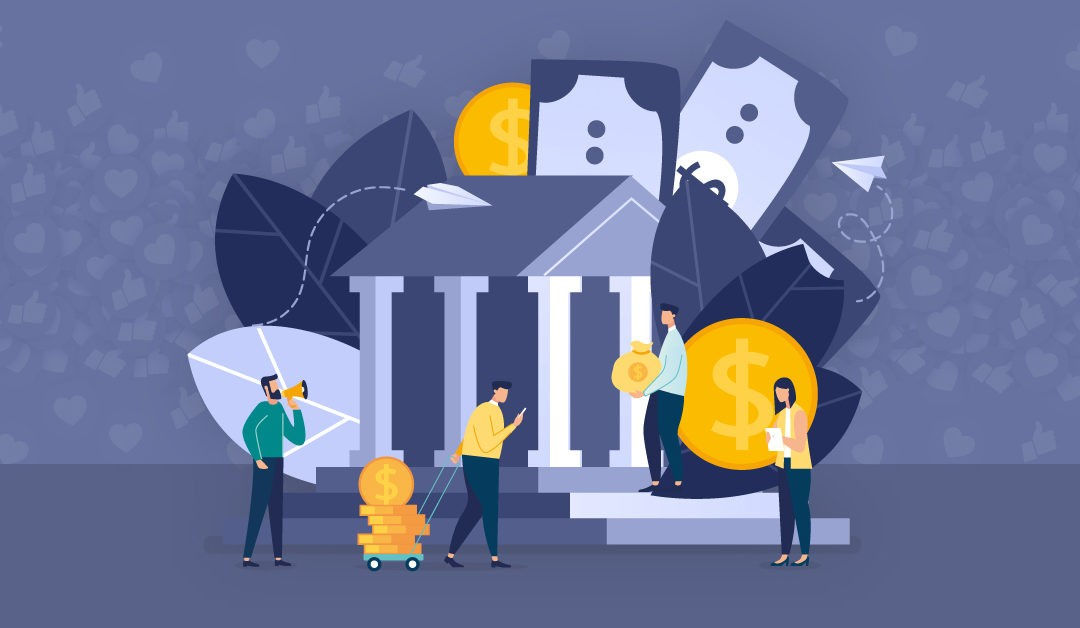

**Project Description:**-The project analyzes the prior marketing campaign data of a **Portuguese banking institution** and **aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering.** The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

**Import Python Libraries:-**

*   **Pandas:-** Data cleaning and data modelling
*   **Numpy:-** Data representation and Mathmetical Operation
*   **Matplotlip:-** Ploting interactive chart and graph
*   **Sciket-learn:-** Used for machine learning model building
*   **Seaborn:-** Data Visualization





In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Uploading:-**

In [539]:
bank = pd.read_csv("https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv",sep=';')
# where we can use sep function for separate the ":" from datasets

**Descriptive Anlaysis of Data:-**

In [540]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [541]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


export the data frame from **jypter Notebook** to **Excel Spreedsheet**

In [542]:
bank.to_excel('output.xlsx',index=False)

In [543]:
bank.shape
# in this data there are 41188 observation and 21 Features

(41188, 21)

In [544]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [545]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000




*   The Bank should focus on Avearge 40 years age




In [546]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Exploratory Data Analysis:-**

In [547]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Categorical Data Visualization:-**

Text(0.5, 1.0, 'Age')

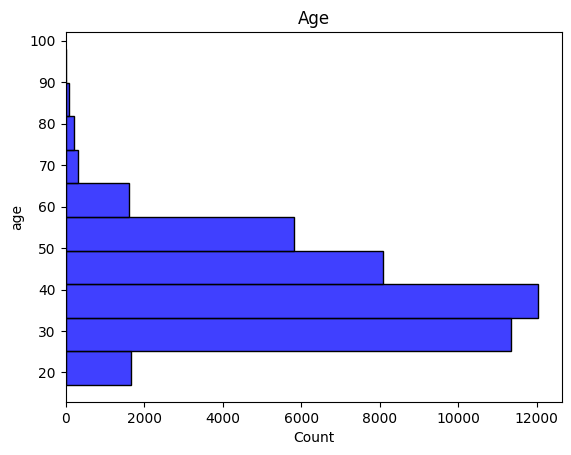

In [548]:
sns.histplot(data=bank,y=bank['age'],bins=10,color="blue")
import matplotlib.pyplot as plt
plt.title("Age")

Text(0.5, 1.0, 'Age to Marital')

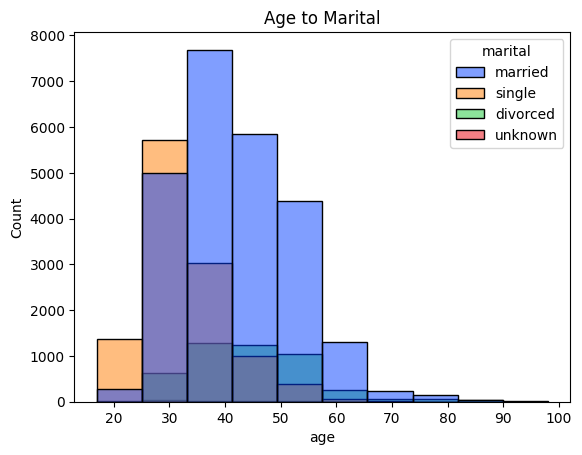

In [549]:
sns.histplot(data=bank,x=bank['age'],bins=10,palette="bright",hue=bank['marital'])
plt.title("Age to Marital")

In [550]:
bank['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

<ipython-input-551-b4b464d6ba72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['job'],palette="bright",order=bank['job'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Job')

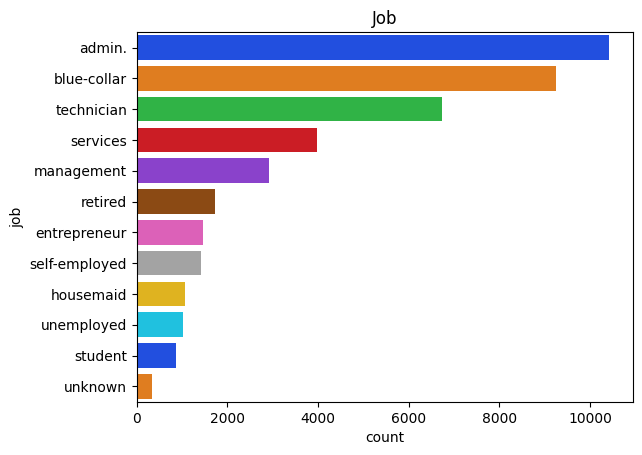

In [551]:
sns.countplot(data=bank,y=bank['job'],palette="bright",order=bank['job'].value_counts(ascending=False).index)
plt.title("Job")

In [552]:
bank['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

<ipython-input-553-867ddd890535>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,x=bank['marital'],palette="plasma",order=bank['marital'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Marital Status')

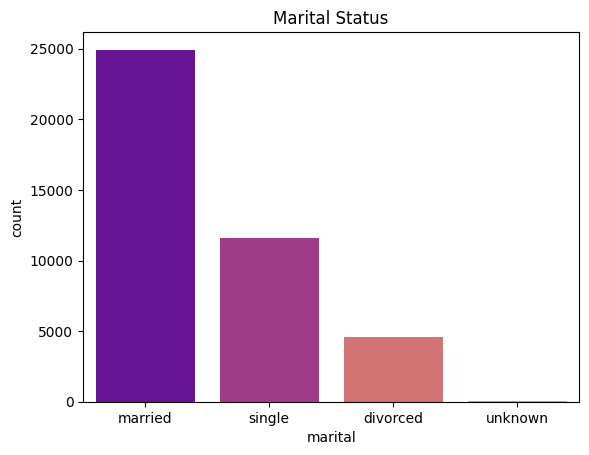

In [553]:
sns.countplot(data=bank,x=bank['marital'],palette="plasma",order=bank['marital'].value_counts(ascending=False).index)
plt.title("Marital Status")

In [554]:
bank['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

<ipython-input-555-eba438f0f233>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['education'],palette="deep",order=bank['education'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Education')

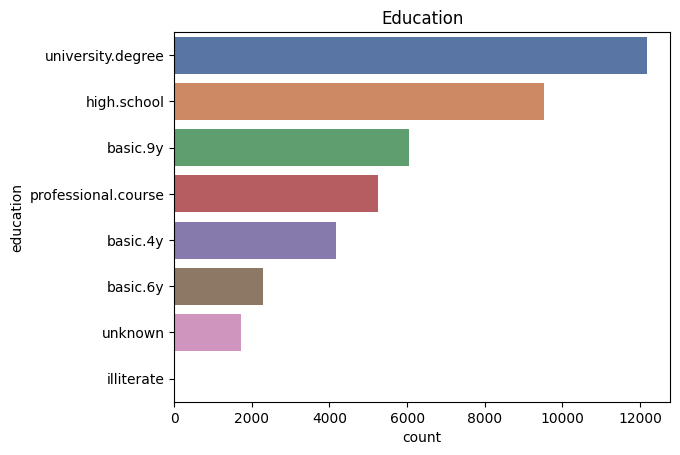

In [555]:
sns.countplot(data=bank,y=bank['education'],palette="deep",order=bank['education'].value_counts(ascending=False).index)
plt.title("Education")

<ipython-input-556-9f19bb94a8e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['default'],palette="bright")


Text(0.5, 1.0, 'Default')

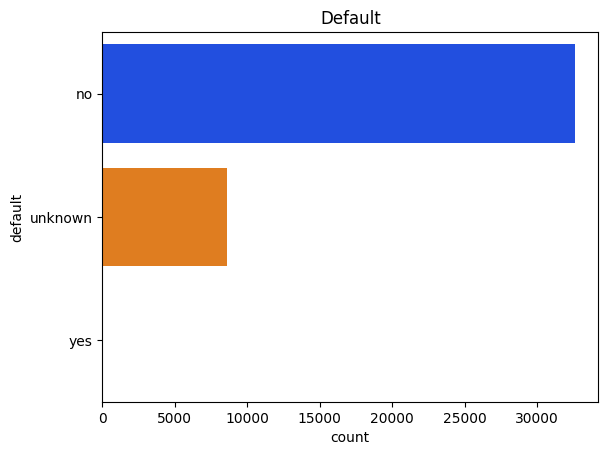

In [556]:
sns.countplot(data=bank,y=bank['default'],palette="bright")
plt.title("Default")

<ipython-input-557-a3573b06edee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['housing'],palette="bright",order=bank['housing'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Housing')

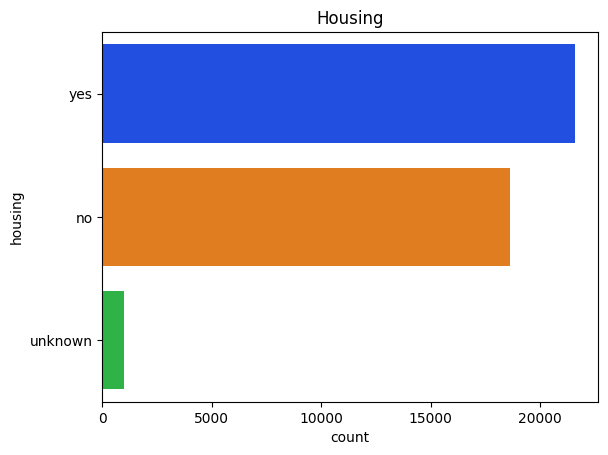

In [557]:
sns.countplot(data=bank,y=bank['housing'],palette="bright",order=bank['housing'].value_counts(ascending=False).index)
plt.title("Housing")

<ipython-input-558-a52f95b03298>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['loan'],palette="bright")


Text(0.5, 1.0, 'Loan')

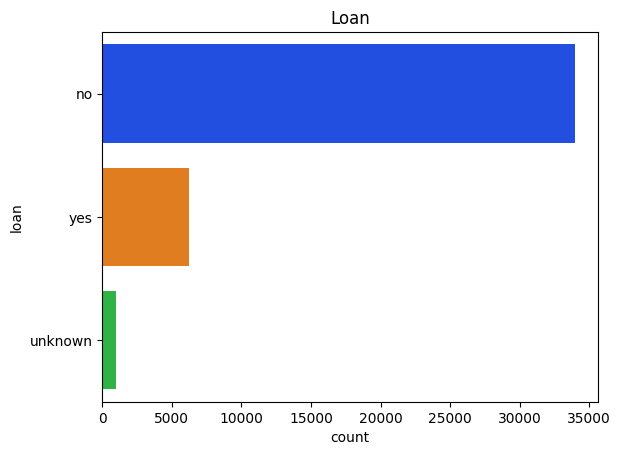

In [558]:
sns.countplot(data=bank,y=bank['loan'],palette="bright")
plt.title("Loan")

In [559]:
bank['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

Text(0.5, 1.0, 'Contact')

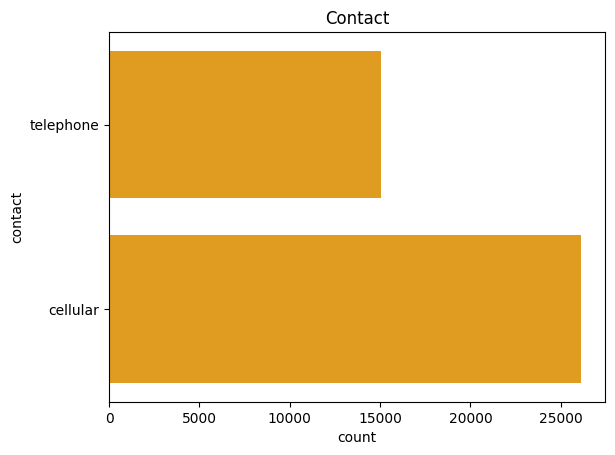

In [560]:
sns.countplot(data=bank,y=bank['contact'],color="orange")
plt.title("Contact")

Text(0.5, 1.0, 'Marital and Contact')

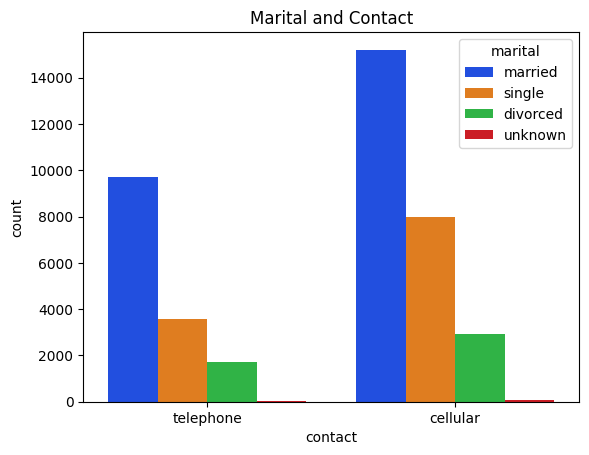

In [561]:
sns.countplot(data=bank,x=bank['contact'],palette="bright",hue=bank['marital'])
plt.title("Marital and Contact")

<Figure size 1500x1000 with 0 Axes>

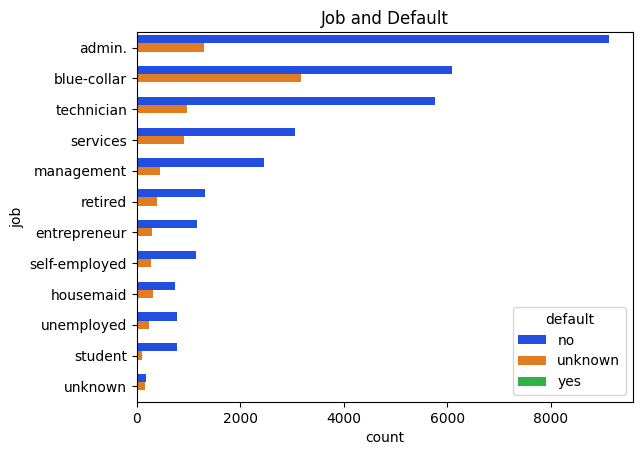

<Figure size 1500x1000 with 0 Axes>

In [562]:
sns.countplot(data=bank,y=bank['job'],palette="bright",hue=bank['default'],order=bank['job'].value_counts(ascending=False).index)
plt.title("Job and Default")
plt.figure(figsize=(15,10))

In [563]:
bank['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

<ipython-input-564-53790810615c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['month'],palette="bright",order=bank['month'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Month')

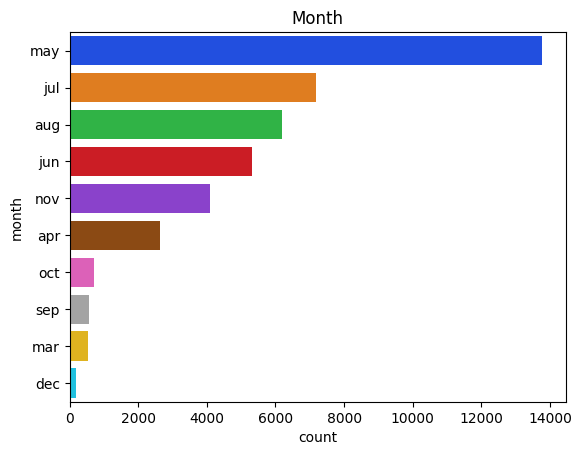

In [564]:
sns.countplot(data=bank,y=bank['month'],palette="bright",order=bank['month'].value_counts(ascending=False).index)
plt.title("Month")

In [565]:
bank['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

<ipython-input-566-38080cfc0831>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['day_of_week'],palette="bright",order=bank['day_of_week'].value_counts(ascending=False).index)


Text(0.5, 1.0, 'Day of Week')

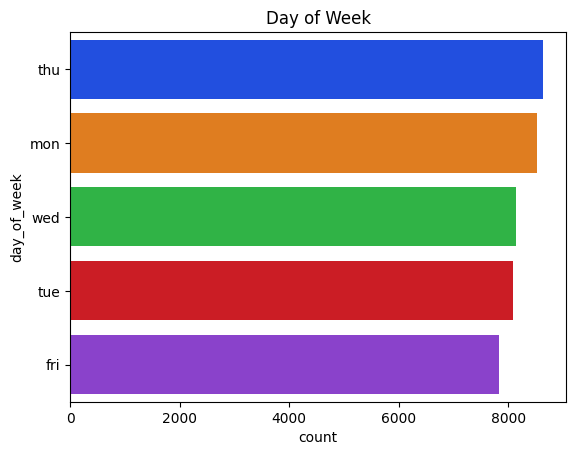

In [566]:
sns.countplot(data=bank,y=bank['day_of_week'],palette="bright",order=bank['day_of_week'].value_counts(ascending=False).index)
plt.title("Day of Week")

**Poutcome Analysis:-**In bank marketing, **poutcome analysis** involves examining the results or outcomes of **past marketing campaigns** to understand their effectiveness and to inform **future marketing strategies**.

In [567]:
bank['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

<ipython-input-568-b8f6e7016599>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank,y=bank['poutcome'],palette="bright")


Text(0.5, 1.0, 'Poutcome')

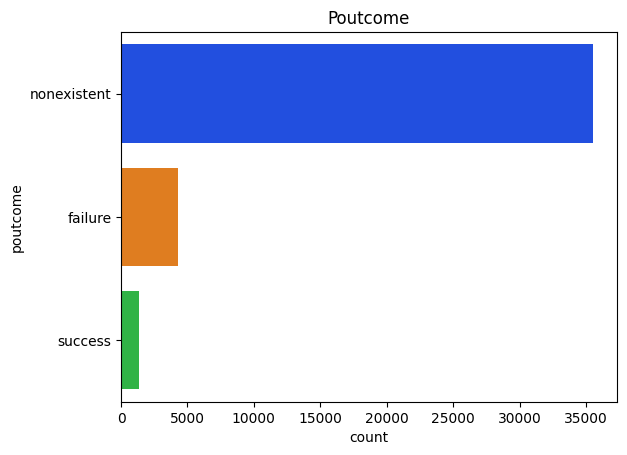

In [568]:
sns.countplot(data=bank,y=bank['poutcome'],palette="bright")
plt.title("Poutcome")

In [569]:
bank['poutcome'].value_counts(normalize=True)

poutcome
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: proportion, dtype: float64

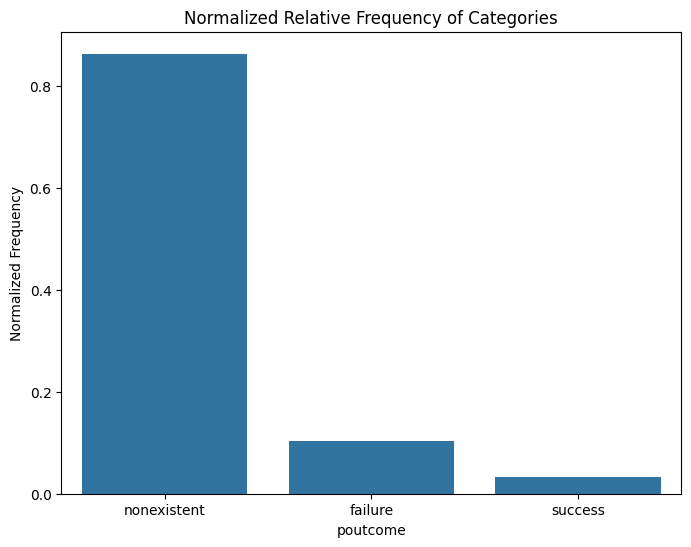

In [570]:

# Calculate normalized value counts
normalized_value_counts = bank['poutcome'].value_counts(normalize=True).reset_index()
normalized_value_counts.columns = ['poutcome', 'Normalized Frequency']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='poutcome', y='Normalized Frequency', data=normalized_value_counts)
plt.xlabel('poutcome')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Relative Frequency of Categories')
plt.show()


**Pandas Replace function used:-** we can replace the "no" and "yes" values of column (y) into **{'no':0,'yes';1}**, the reason behind replace is we can easily predicting classification problem.

In [571]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [572]:
bank['y'].replace({'no':0,'yes':1},inplace=True)

In [573]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: title={'center': 'Marital status and Default'}, xlabel='y', ylabel='count'>

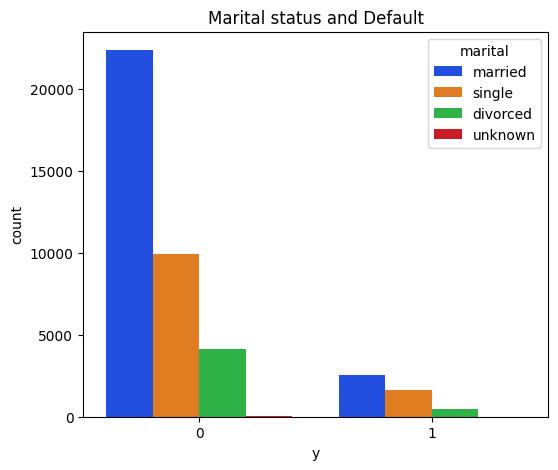

In [574]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.title("Marital status and Default")
sns.countplot(data=bank,x=bank['y'],palette='bright',hue=bank['marital'])
# the bank should to focus in maximum target class to married

In [576]:
bank['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [577]:
bank.query("age>60").head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8645,61,retired,married,high.school,no,unknown,unknown,telephone,jun,wed,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1
27715,61,admin.,married,university.degree,no,yes,no,cellular,mar,mon,...,6,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,0
27723,66,technician,married,professional.course,no,yes,no,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.799,5099.1,1
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0


In [578]:
bank.query("age>60").shape

(910, 21)

In [579]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [580]:
bank.shape

(41188, 21)

**Categorical Analysis:-**

In [581]:
bank['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [582]:
bank['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [583]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [584]:
bank['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [585]:
bank['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [586]:
bank['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [587]:
bank['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [588]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [589]:
bank['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

**Import Preprocessing From Machine Learning:-**Preprocessing in machine learning refers to the steps taken to prepare and clean the data before it is fed into a machine learning algorithm. This process is crucial because the quality of the data directly affects the performance of the model.

In [590]:
from sklearn import  preprocessing

**Import LabelEncoder from Preprocessing:-** it is a class provided by scikit-learn's **preprocessing** module that is used to encode categorical (qualitative) variables into numerical (quantitative) labels. It assigns a unique integer to each category in the variable.

In [591]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [592]:
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['default'] = le.fit_transform(bank['default'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['loan'] = le.fit_transform(bank['loan'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['day_of_week'] = le.fit_transform(bank['day_of_week'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])

In [593]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [594]:
bank.shape

(41188, 21)

In [595]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Defined Features (x) and Target (y) :-**

In [599]:
x = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
y = bank['y']

In [645]:
# print (x)
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [646]:
# print (y)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

**Import Train-Test-Split from Machine Learning:-**

In [602]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,train_size=0.8,random_state=2529)

In [603]:
x_train.shape

(8238, 20)

In [604]:
x_test.shape

(32950, 20)

In [605]:
y_train.shape

(8238,)

In [606]:
y_test.shape

(32950,)

**Logistics Regression:-**

In [607]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

**Train and Fit the Model:-**

In [608]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [609]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25950,36,0,2,6,0,2,0,0,7,4,214,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
37572,46,9,1,5,0,2,0,0,1,0,182,6,999,1,0,-2.9,92.201,-31.4,0.869,5076.2
39004,42,7,1,6,0,0,0,0,2,4,179,1,6,1,2,-3.0,92.713,-33.0,0.715,5023.5
19434,47,4,1,6,0,2,2,0,1,4,135,2,999,0,1,1.4,93.444,-36.1,4.967,5228.1
16557,30,4,1,6,0,0,0,0,3,4,103,4,999,0,1,1.4,93.918,-42.7,4.963,5228.1


In [610]:
y_train.head()

25950    0
37572    1
39004    1
19434    0
16557    0
Name: y, dtype: int64

In [611]:
model.intercept_

array([0.00395618])

In [612]:
model.coef_

array([[ 0.00749098,  0.01159326,  0.1192659 ,  0.05554455, -0.18930165,
        -0.00126873, -0.08557086, -0.31127586, -0.09456243,  0.03768781,
         0.00472938, -0.01862344, -0.00158956, -0.25082967,  0.2303464 ,
        -0.20524331,  0.53540156,  0.04980808, -0.11868228, -0.00981826]])

**Model Predict:-**

In [613]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [614]:
y_pred = model.predict(x_test)

**Model Evaluation:-**

In [615]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report

In [616]:
confusion_matrix(y_test,y_pred)

array([[28459,   749],
       [ 2260,  1482]])

In [617]:
accuracy_score(y_test,y_pred)

0.908679817905918

In [618]:
f1_score(y_test,y_pred)

0.4962330487192365

In [619]:
precision_score(y_test,y_pred)

0.6642761093679964

In [620]:
logistics_report = classification_report(y_test,y_pred)

In [621]:
print(logistics_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29208
           1       0.66      0.40      0.50      3742

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.72     32950
weighted avg       0.90      0.91      0.90     32950



**Decesion Tree Model** **:-** A decision tree is a popular machine learning model used for both classification and regression tasks. It's a tree-like structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome (class label or regression value).

In [622]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25950,36,0,2,6,0,2,0,0,7,4,214,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
37572,46,9,1,5,0,2,0,0,1,0,182,6,999,1,0,-2.9,92.201,-31.4,0.869,5076.2
39004,42,7,1,6,0,0,0,0,2,4,179,1,6,1,2,-3.0,92.713,-33.0,0.715,5023.5
19434,47,4,1,6,0,2,2,0,1,4,135,2,999,0,1,1.4,93.444,-36.1,4.967,5228.1
16557,30,4,1,6,0,0,0,0,3,4,103,4,999,0,1,1.4,93.918,-42.7,4.963,5228.1


In [623]:
y_train.head()

25950    0
37572    1
39004    1
19434    0
16557    0
Name: y, dtype: int64

In [624]:
x_train.shape

(8238, 20)

In [625]:
y_train.shape

(8238,)

In [626]:
x_test.shape

(32950, 20)

In [627]:
y_test.shape

(32950,)

**Model Selection:-**

In [628]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_leaf_nodes=10)

In [629]:
import sklearn.tree as tree

In [630]:
print(tree.plot_tree)

<function plot_tree at 0x7c273c140430>


In [631]:
print(type(bank))

<class 'pandas.core.frame.DataFrame'>


In [632]:
 bank = tree.DecisionTreeClassifier()

**Train and Fit the Model:-**

In [633]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

**Model Predict:-**

In [634]:
model2.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [635]:
y_pred2 = model2.predict(x_test)

**Model Accuracy Check:-**

In [636]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [637]:
accuracy_score(y_test,y_pred2)

0.9106828528072838

In [638]:
roc_auc_score(y_test,y_pred2)

0.7239598773009189

In [639]:
Tree_report = classification_report(y_test,y_pred2)

In [640]:
print(Tree_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29208
           1       0.64      0.48      0.55      3742

    accuracy                           0.91     32950
   macro avg       0.79      0.72      0.75     32950
weighted avg       0.90      0.91      0.91     32950



In [641]:
import matplotlib.pyplot as plt

In [642]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

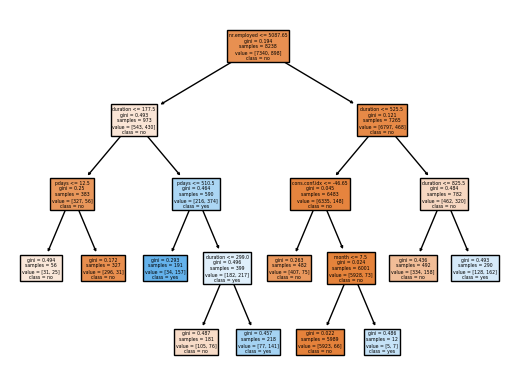

In [644]:
tree.plot_tree(model,filled=True,feature_names=('age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'),class_names=['no','yes'])
plt.show()

**Random Forest Model:-**A Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes

In [647]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25950,36,0,2,6,0,2,0,0,7,4,214,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
37572,46,9,1,5,0,2,0,0,1,0,182,6,999,1,0,-2.9,92.201,-31.4,0.869,5076.2
39004,42,7,1,6,0,0,0,0,2,4,179,1,6,1,2,-3.0,92.713,-33.0,0.715,5023.5
19434,47,4,1,6,0,2,2,0,1,4,135,2,999,0,1,1.4,93.444,-36.1,4.967,5228.1
16557,30,4,1,6,0,0,0,0,3,4,103,4,999,0,1,1.4,93.918,-42.7,4.963,5228.1


In [648]:
y_train.head()

25950    0
37572    1
39004    1
19434    0
16557    0
Name: y, dtype: int64

**Model Selection:-**

In [649]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

**Train and fit to model:-**

In [650]:
model3.fit(x_train,y_train)

RandomForestClassifier()

**Model Predict:-**

In [651]:
model3.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [652]:
y_pred3 = model3.predict(x_test)

**Model Evaluation:-**

In [653]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_auc_score

In [654]:
accuracy_score(y_test,y_pred3)

0.9105918057663126

In [655]:
f1_score(y_test,y_pred3)

0.5310410697230181

In [656]:
confusion_matrix(y_test,y_pred3)

array([[28336,   872],
       [ 2074,  1668]])

In [657]:
roc_auc_score(y_test,y_pred3)

0.7079480505183633

In [658]:
random_report = classification_report(y_test,y_pred3)

In [659]:
print(random_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29208
           1       0.66      0.45      0.53      3742

    accuracy                           0.91     32950
   macro avg       0.79      0.71      0.74     32950
weighted avg       0.90      0.91      0.90     32950



**Project Conclusion:-**

1.   The **Decision Tree and Random Forest Classification** model is the best Predictive model Machine Learning Algorithm for Bank Marketing Prediction.

